<a href="https://colab.research.google.com/github/ferjozsot23/student_grade_predictor/blob/main/Grade_of_students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STUDENT GRADE PREDICTOR**
Predict student grade with social factor





# INTRODUCTION




# GET THE DATA

In [1]:
import pandas as pd
student_url = 'https://raw.githubusercontent.com/ferjozsot23/student_grade_predictor/main/Student_Performance.csv'
student = pd.read_csv(student_url)

# EXPLORATORY DATA ANALYSIS

In [2]:
student.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9038,5,82,Yes,6,7,72.0
5557,2,56,No,8,9,33.0
2370,8,78,No,7,0,72.0
2066,1,99,No,9,9,79.0
805,2,47,No,8,6,28.0


In [3]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
for col in student.columns:
  student.rename(
      columns={
      col: col.lower().replace(" ", "_")
      },
                 inplace=True)

student.rename(columns={"sample_question_papers_practiced": "simulators"}, inplace="True")
student

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,simulators,performance_index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [5]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hours_studied               10000 non-null  int64  
 1   previous_scores             10000 non-null  int64  
 2   extracurricular_activities  10000 non-null  object 
 3   sleep_hours                 10000 non-null  int64  
 4   simulators                  10000 non-null  int64  
 5   performance_index           10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
import numpy as np
np.sort(student["hours_studied"].unique())

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
student["hours_studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9])

In [8]:
corr_matrix = student.corr()
corr_matrix["performance_index"].sort_values(ascending=False)

<ipython-input-8-75af11d954e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = student.corr()


performance_index    1.000000
previous_scores      0.915189
hours_studied        0.373730
sleep_hours          0.048106
simulators           0.043268
Name: performance_index, dtype: float64

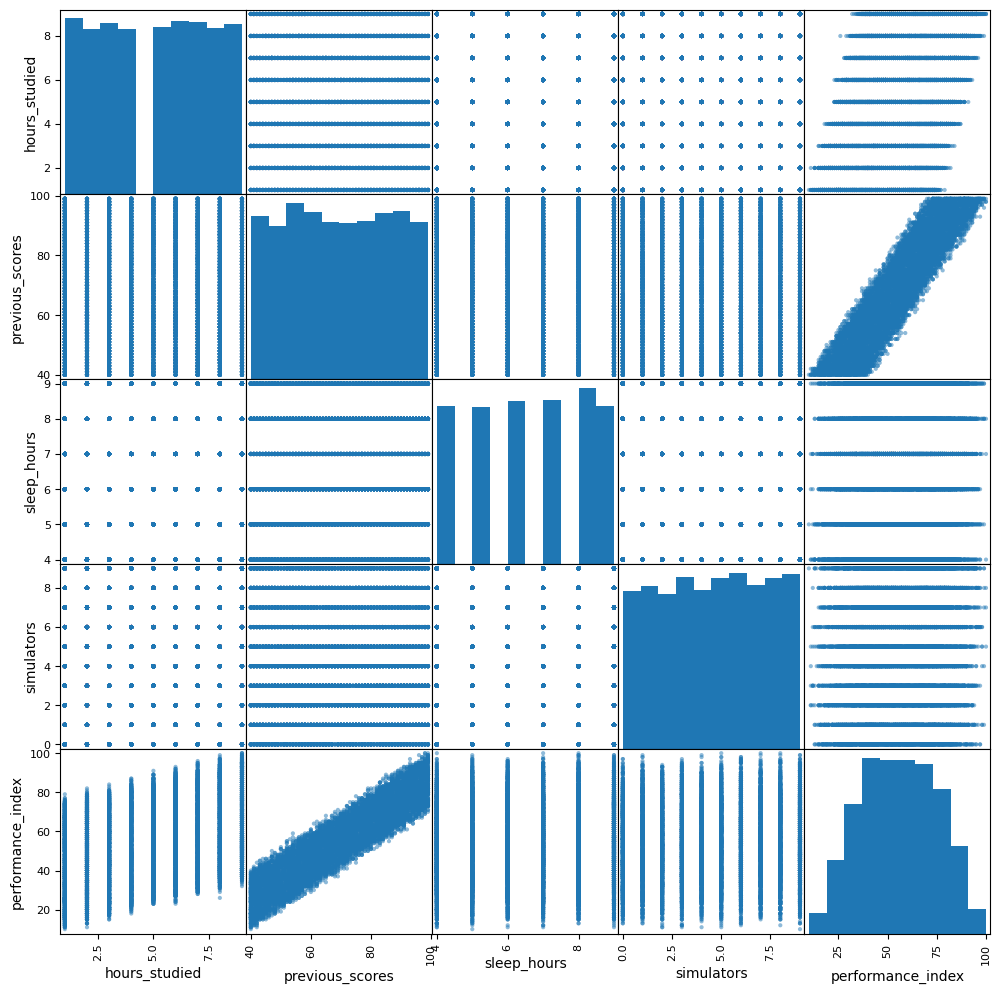

In [9]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(student, figsize=(12, 12))

plt.show()

# Prepare the Data for Machine Learning Algorithms

## Feature Engineering


Pendiente, hay que ver como el sleep hours bucket afecta los modelos

No lineal pero si relación categórica

In [10]:
import pandas as pd

# Definir los límites de los buckets para Sleep Hours
bins = [0, 4, 7, float('inf')]
labels = ['Bajo', 'Medio', 'Alto']

# Crear la nueva variable 'sleep_hours_buckets'
student['sleep_hours_buckets'] = pd.cut(student['sleep_hours'], bins=bins, labels=labels, right=False)
student

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,simulators,performance_index,sleep_hours_buckets
0,7,99,Yes,9,1,91.0,Alto
1,4,82,No,4,2,65.0,Medio
2,8,51,Yes,7,2,45.0,Alto
3,5,52,Yes,5,2,36.0,Medio
4,7,75,No,8,5,66.0,Alto
...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,Medio
9996,7,64,Yes,8,5,58.0,Alto
9997,6,83,Yes,8,5,74.0,Alto
9998,9,97,Yes,7,0,95.0,Alto


Crear nuevas features relacionadas entre sí

In [11]:
student["hours_per_simulator"] = student["hours_studied"] / student["simulators"]
student = student.replace([np.inf, -np.inf], np.nan)

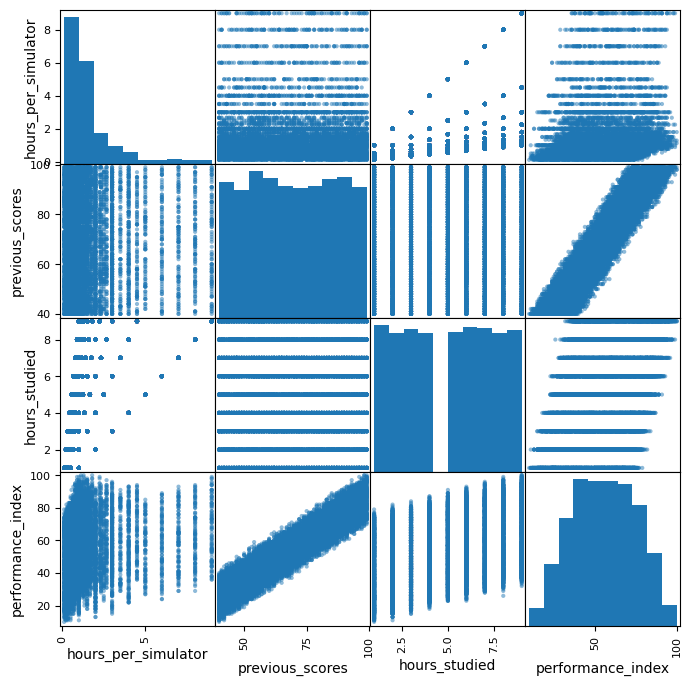

In [12]:
attributes = ["hours_per_simulator", "previous_scores", "hours_studied", "performance_index"]


scatter_matrix(student[attributes], figsize=(8, 8))
plt.show()

Crear una nueva característica que capture la relación no lineal con Sleep Hours


In [13]:
student['sleep_hours_squared'] = student['sleep_hours'] ** 2
# O raíz cuadrada
student['sqrt_sleep_hours'] = np.sqrt(student['sleep_hours'])
corr_matrix = student.corr()
corr_matrix["performance_index"].sort_values(ascending=False)

<ipython-input-13-15ec1dcfca16>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = student.corr()


performance_index      1.000000
previous_scores        0.915189
hours_studied          0.373730
hours_per_simulator    0.159882
sleep_hours_squared    0.048470
sleep_hours            0.048106
sqrt_sleep_hours       0.047727
simulators             0.043268
Name: performance_index, dtype: float64

No existe relación:

In [14]:
student.drop(columns=["sqrt_sleep_hours", "sleep_hours_squared"],inplace=True)

In [15]:
corr_matrix = student.corr()
corr_matrix["performance_index"].sort_values(ascending=False)

<ipython-input-15-75af11d954e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = student.corr()


performance_index      1.000000
previous_scores        0.915189
hours_studied          0.373730
hours_per_simulator    0.159882
sleep_hours            0.048106
simulators             0.043268
Name: performance_index, dtype: float64

## Estratificación

In [16]:
student

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,simulators,performance_index,sleep_hours_buckets,hours_per_simulator
0,7,99,Yes,9,1,91.0,Alto,7.0
1,4,82,No,4,2,65.0,Medio,2.0
2,8,51,Yes,7,2,45.0,Alto,4.0
3,5,52,Yes,5,2,36.0,Medio,2.5
4,7,75,No,8,5,66.0,Alto,1.4
...,...,...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0,Medio,0.5
9996,7,64,Yes,8,5,58.0,Alto,1.4
9997,6,83,Yes,8,5,74.0,Alto,1.2
9998,9,97,Yes,7,0,95.0,Alto,NaN


In [17]:
student.drop(columns=["sleep_hours_buckets", "hours_per_simulator"], inplace=True)
student

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,simulators,performance_index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [18]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    student,
    test_size=0.2,
    random_state=42
    )

In [19]:
student = strat_train_set.drop("performance_index", axis=1)
student_label = strat_train_set["performance_index"].copy()

In [22]:
from sklearn.compose import make_column_selector

# CLEANING DATA PIPELINE

In [23]:
# Imputer missing values hours per simulator
# One hot encoding extracurricular
# Standarized previous score

In [24]:
# Crear el cat_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler


cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

In [26]:
from sklearn.preprocessing import StandardScaler
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    RobustScaler(),
    StandardScaler()
    )


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline

def column_ratio(X):
    # Ensure X[:, 0] and X[:, 1] are of type float
    x0 = X[:, 0].astype(float)
    x1 = X[:, 1].astype(float)
    ratio = np.divide(x0, x1, out=np.zeros_like(x0), where=x1 != 0)

    # Reshape the result to a 2D column vector
    return ratio.reshape(-1, 1)

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="constant", fill_value=0),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
import pandas as pd



# Crear el ColumnTransformer con tres elementos en la tupla
preprocessing = ColumnTransformer([
    ('cat', cat_pipeline, ["extracurricular_activities"]),
    ('hours_per_simulator', ratio_pipeline(), ["hours_studied", "simulators"]),
    ('num', num_pipeline, make_column_selector(dtype_include=["int", "float"]))
],
    remainder='passthrough'  # Tratar otras columnas no mencionadas como "passthrough"
)

# Aplicar las transformaciones
student_preprocessed = preprocessing.fit_transform(student)

# Mostrar el resultado (si lo deseas)
pd.DataFrame(student_preprocessed, columns=preprocessing.get_feature_names_out(), index=student.index)


,cat__extracurricular_activities_No,cat__extracurricular_activities_Yes,hours_per_simulator__ratio,num__hours_studied,num__previous_scores,num__sleep_hours,num__simulators
9254,1.0,0.0,-0.226514,0.006455,-1.183844,0.269888,0.134041
1561,0.0,1.0,-0.633604,-1.149747,-1.241506,0.269888,0.483562
1670,1.0,0.0,-0.226514,-1.149747,0.661318,0.269888,-0.914520
6087,1.0,0.0,0.384120,-1.149747,-1.356828,-0.318906,-1.264041
6669,1.0,0.0,-0.837149,1.162658,-1.299167,1.447477,-1.613561
...,...,...,...,...,...,...,...
5734,0.0,1.0,-0.022970,1.162658,-1.126183,-0.318906,0.483562
5191,1.0,0.0,-0.022970,-0.378946,-0.088279,1.447477,-0.565000
5390,1.0,0.0,0.078803,1.548059,-1.241506,0.269888,0.483562
860,1.0,0.0,-0.837149,-1.535148,-1.299167,1.447477,-1.613561


# SELECT AND TRAIN A MODEL

In [29]:
X = student
y = student_label

# Linear Regressor

In [30]:
from sklearn.linear_model import LinearRegression

model_lin_reg = make_pipeline(
    preprocessing,
    LinearRegression()
)

model_lin_reg.fit(X, y )


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['extracurricular_activities']),
                                                 ('hours_per_simulator',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 st...
                                                                                       func=<function column_ratio at 0x7b6c1e3272e0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['hours_studied',
                                                   'simulators']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b6c1e0846a0>)])),
                ('linearregression', LinearRegression())])

In [31]:
score = model_lin_reg.score(student, student_label)
score

0.988689141496066

Cross-validation

In [32]:
# Entrena y hace las validaciones 9 veces para sacar 10 rmse
from sklearn.model_selection import cross_val_score

model_lr_rmse = -cross_val_score(
    model_lin_reg,
    X, y,
    scoring="neg_root_mean_squared_error", cv=10)
pd.DataFrame(model_lr_rmse).describe()

,0
count,10.000000
mean,2.043720
std,0.058709
min,1.954144
25%,2.007378
50%,2.024014
75%,2.089653
max,2.140849


# SVM Regressor

In [33]:
from sklearn.svm import SVR
model_svr = make_pipeline(
    preprocessing,
    SVR()  # Puedes ajustar los hiperparámetros aquí según sea necesario
)

# Entrenar el modelo SVR
model_svr.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['extracurricular_activities']),
                                                 ('hours_per_simulator',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 st...
                                                                                       func=<function column_ratio at 0x7b6c1e3272e0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['hours_studied',
                                                   'simulators']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b6c1e0846a0>)])),
                ('svr', SVR())])

In [34]:
from sklearn.model_selection import cross_val_score

svm_rmse = -cross_val_score(
    model_svr,
    X , y,
    scoring="neg_root_mean_squared_error",
    cv=10)

pd.DataFrame(svm_rmse).describe()

,0
count,10.000000
mean,2.450785
std,0.072224
min,2.356903
25%,2.395716
50%,2.443143
75%,2.505814
max,2.572406


## DECISION TREE

In [35]:
from sklearn.tree import DecisionTreeRegressor

model_tree_reg = make_pipeline(
    preprocessing,
    DecisionTreeRegressor(random_state=42)
)

model_tree_reg.fit(X, y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['extracurricular_activities']),
                                                 ('hours_per_simulator',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 st...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['hours_studied',
                                                   'simulators']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b6c1e0846a0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

Entrenar y hacer validaciones del modelo model_tree_reg

In [36]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(
    model_tree_reg,
    X , y,
    scoring="neg_root_mean_squared_error",
    cv=10)

pd.DataFrame(tree_rmses).describe()


,0
count,10.000000
mean,3.047810
std,0.040209
min,2.984834
25%,3.013787
50%,3.059445
75%,3.081522
max,3.091060


## RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestRegressor
model_forest_reg = make_pipeline(
    preprocessing,
    RandomForestRegressor(random_state=42)
)
model_forest_reg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['extracurricular_activities']),
                                                 ('hours_per_simulator',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 st...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['hours_studied',
                                                   'simulators']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b6c1e0846a0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

Cross-validation

In [38]:
# Entrena y hace las validaciones 9 veces para sacar 10 rmse
forest_rmses = -cross_val_score(
    model_forest_reg,
    X, y,
    scoring="neg_root_mean_squared_error", cv=10)
pd.DataFrame(forest_rmses).describe()

,0
count,10.000000
mean,2.347859
std,0.052041
min,2.281908
25%,2.304806
50%,2.352354
75%,2.383326
max,2.439883


Comparising

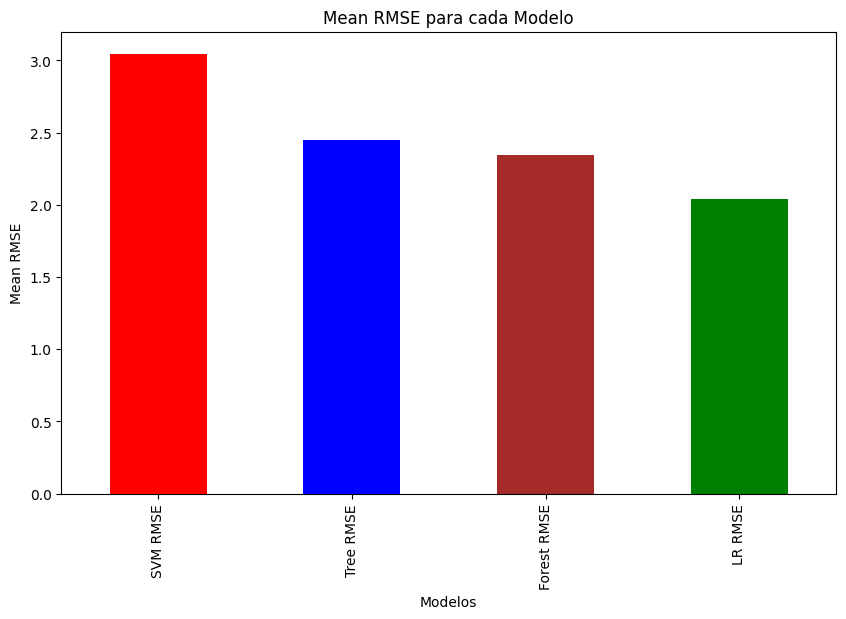

In [39]:
result_df = pd.concat([pd.Series(forest_rmses), pd.Series(model_lr_rmse), pd.Series(tree_rmses), pd.Series(svm_rmse)], axis=1)
result_df.columns=['Forest RMSE', 'LR RMSE', 'SVM RMSE','Tree RMSE']

max_values = result_df.mean().sort_values(ascending=False)

# Crear el diagrama de barras
max_values.plot(kind='bar', figsize=(10, 6), color=['red', 'blue', 'brown', 'green'])

# Añadir etiquetas y título
plt.xlabel('Modelos')
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE para cada Modelo')


# Mostrar el diagrama de barras
plt.show()

In [40]:
result_df.mean().sort_values()

LR RMSE        2.043720
Forest RMSE    2.347859
Tree RMSE      2.450785
SVM RMSE       3.047810
dtype: float64

# FINE TUNE LINEAR REGRESSION

In [41]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
   'linearregression__fit_intercept': [True, False],
}

# Crear el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(
    model_lin_reg,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_root_mean_squared_error',
    cv=10)

# Entrenar el modelo con búsqueda aleatoria
random_search.fit(X, y)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Mostrar el mejor RMSE encontrado
print("Mejor RMSE:", -random_search.best_score_)

final_model_lr = random_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores hiperparámetros: {'linearregression__fit_intercept': True}
Mejor RMSE: 2.043720145788242


# Evaluating on test set

In [42]:
strat_test_set

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,simulators,performance_index
6252,5,69,No,8,2,51.0
4684,2,46,Yes,4,8,20.0
1731,7,56,Yes,7,5,46.0
4742,6,42,Yes,8,5,28.0
4521,7,53,No,4,6,41.0
...,...,...,...,...,...,...
6412,2,70,No,7,3,45.0
8285,4,79,No,9,3,66.0
7853,2,40,Yes,7,2,16.0
1095,3,83,No,7,5,65.0


In [58]:
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

X_test = strat_test_set.drop("performance_index", axis=1)
y_test = strat_test_set["performance_index"].copy()

final_predictions = final_model_lr.predict(X_test)


In [59]:
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print("RMSE: ", final_rmse)
r2 = r2_score(y_test, final_predictions)
print("R2 score: ", r2)

RMSE:  2.020255661922376
R2 score:  0.9889865168261928


In [66]:
nuevo_registro = pd.DataFrame([{"hours_studied": 9, "previous_scores":87, "extracurricular_activities": "Yes", "sleep_hours":7, "simulators": 5}])
prediccion = final_model_lr.predict(nuevo_registro)
prediccion

array([85.15234375])

# Model persistence using joblib

In [67]:
import joblib

joblib.dump(final_model_lr, "student_final_score_model.pkl")

['student_final_score_model.pkl']

In [68]:
nuevo_registro = pd.DataFrame([{"hours_studied": 9, "previous_scores":87, "extracurricular_activities": "Yes", "sleep_hours":7, "simulators": 5}])
final_model_reloaded = joblib.load("student_final_score_model.pkl")

predictions = final_model_reloaded.predict(nuevo_registro)
predictions

array([85.15234375])